<a href="https://colab.research.google.com/github/audwls4545/metaverse/blob/main/%EC%97%B0%EB%A0%B9%EB%B3%84_%EA%B2%BD%EC%A0%9C%ED%99%9C%EB%8F%99%EC%9D%B8%EA%B5%AC_%EC%B4%9D%EA%B4%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 49.7 MB/s eta 0:00:00


In [2]:
import os
import pandas as pd
import requests

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [3]:
# json -> dataframe
def load_data(json_URL):
    request = requests.get(json_URL)
    print(request)
    json_data = request.json()
    data = pd.DataFrame(json_data)

    return data

In [4]:
# API
api_key = 'MzBhNzU3OTc1NTg4MTYxMWZlZWFmYjAwZmExZWM2MWU='        # 본인의 API key를 발급받아 사용하세요.
json_URL = f'https://kosis.kr/openapi/Param/statisticsParameterData.do?method=getList&apiKey={api_key}&itmId=T10+T20+T30+T40+T50+T60+T80+T90+&objL1=ALL&objL2=&objL3=&objL4=&objL5=&objL6=&objL7=&objL8=&format=json&jsonVD=Y&prdSe=Q&startPrdDe=201801&endPrdDe=202301&orgId=101&tblId=DT_1DA7002S'

In [5]:
table = load_data(json_URL)
table.shape

<Response [200]>


(3549, 16)

In [6]:
table.head(5)

,TBL_NM,PRD_DE,TBL_ID,ITM_NM,ITM_NM_ENG,ITM_ID,UNIT_NM,ORG_ID,UNIT_NM_ENG,C1_OBJ_NM,C1_OBJ_NM_ENG,DT,PRD_SE,C1,C1_NM,C1_NM_ENG
0,연령별 경제활동인구 총괄,201801,DT_1DA7002S,인구,Population 15 years old and over,T10,천명,101,Thousand Person,연령계층별,By age group,44088.4,Q,00,15세 이상 전체,Total
1,연령별 경제활동인구 총괄,201802,DT_1DA7002S,인구,Population 15 years old and over,T10,천명,101,Thousand Person,연령계층별,By age group,44141.1,Q,00,15세 이상 전체,Total
2,연령별 경제활동인구 총괄,201803,DT_1DA7002S,인구,Population 15 years old and over,T10,천명,101,Thousand Person,연령계층별,By age group,44211.7,Q,00,15세 이상 전체,Total
3,연령별 경제활동인구 총괄,201804,DT_1DA7002S,인구,Population 15 years old and over,T10,천명,101,Thousand Person,연령계층별,By age group,44287.2,Q,00,15세 이상 전체,Total
4,연령별 경제활동인구 총괄,201901,DT_1DA7002S,인구,Population 15 years old and over,T10,천명,101,Thousand Person,연령계층별,By age group,44370.1,Q,00,15세 이상 전체,Total


import numpy as np
from google.colab import autoviz
df_4843688271658091408 = autoviz.get_registered_df('df_4843688271658091408')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4843688271658091408, *['PRD_DE'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4843688271658091408 = autoviz.get_registered_df('df_4843688271658091408')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_4843688271658091408, *['DT'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4843688271658091408 = autoviz.get_registered_df('df_4843688271658091408')

def heatmap(df, x_colname, y_colname, figsize=(2, 2)):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=sns.cubehelix_palette(start=.5, rot=-.8))
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_4843688271658091408, *['PRD_DE', 'DT'], **{})
chart

In [7]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3549 entries, 0 to 3548
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TBL_NM         3549 non-null   object
 1   PRD_DE         3549 non-null   object
 2   TBL_ID         3549 non-null   object
 3   ITM_NM         3549 non-null   object
 4   ITM_NM_ENG     3549 non-null   object
 5   ITM_ID         3549 non-null   object
 6   UNIT_NM        3549 non-null   object
 7   ORG_ID         3549 non-null   object
 8   UNIT_NM_ENG    3549 non-null   object
 9   C1_OBJ_NM      3549 non-null   object
 10  C1_OBJ_NM_ENG  3549 non-null   object
 11  DT             3549 non-null   object
 12  PRD_SE         3549 non-null   object
 13  C1             3549 non-null   object
 14  C1_NM          3549 non-null   object
 15  C1_NM_ENG      3549 non-null   object
dtypes: object(16)
memory usage: 443.8+ KB


In [8]:
# 결측치가 문자로 되어있는지 확인
print(sorted(table['DT'].unique()))

['1.1', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '10', '10.1', '10.2', '10.4', '10.6', '10.7', '10.8', '10.9', '1000.6', '101.5', '101.6', '1010.3', '1012', '102.2', '1024', '1025.2', '1027.4', '103.3', '1030.5', '1033.7', '104.2', '104.9', '1043.4', '10464.1', '105.4', '1051.6', '10549.7', '10575.2', '1058.4', '1058.9', '106.8', '10635.3', '1065', '1065.2', '1066.3', '1069.4', '1070.6', '1070.7', '10707.8', '10724.5', '1074.8', '1077.5', '108', '108.2', '108.5', '10842.8', '1086.1', '1090', '10979', '11', '11.1', '11.2', '11.5', '11.6', '11.7', '11.9', '110.6', '1101.3', '1105.1', '1105.3', '11059.3', '11060.4', '111', '11106.4', '11113.6', '11128.5', '1113.1', '11176.7', '1119.6', '112.8', '11204.1', '1121.6', '11211.2', '11215.4', '11245.6', '11247.5', '1128', '1129.2', '1130.4', '1131.8', '11314.3', '11398.3', '114.1', '114.5', '11430.2', '11453.3', '1147', '11472.6', '11477.2', '1149.3', '115.4', '115.7', '1151.4', '11541.8', '11548.1', '11557.4', '116.2', '116.5', '116.6'

In [9]:
table.columns

Index(['TBL_NM', 'PRD_DE', 'TBL_ID', 'ITM_NM', 'ITM_NM_ENG', 'ITM_ID',
       'UNIT_NM', 'ORG_ID', 'UNIT_NM_ENG', 'C1_OBJ_NM', 'C1_OBJ_NM_ENG', 'DT',
       'PRD_SE', 'C1', 'C1_NM', 'C1_NM_ENG'],
      dtype='object')

In [13]:
table['C1_NM'].unique()

array(['15세 이상 전체', '15 - 19세', '20 - 29세', '20 - 24세', '25 - 29세',
       '30 - 39세', '30 - 34세', '35 - 39세', '40 - 49세', '40 - 44세',
       '45 - 49세', '50 - 59세', '50 - 54세', '55 - 59세', '60세이상',
       'ㆍ60 - 64세', '65세 이상', '15 - 64세', '15 - 24세', '15 - 29세',
       '60 - 69세', 'ㆍ65 - 69세', '70세 이상'], dtype=object)

In [14]:
table['C1'].unique()

array(['00', '10', '20', '201', '202', '30', '301', '302', '40', '401',
       '402', '50', '501', '502', '60', '601', '602', '63', '70', '75',
       '91', '912', '92'], dtype=object)

In [15]:
total = table[table['C1_NM']=='15세 이상 전체']

In [32]:
#15세 이상 전체 경제활동
total_num = total.iloc[:,[1,11,13,14]]  #[['PRD_DE'],['DT'],['C1'],['C1_NM']]

,PRD_DE,DT,C1,C1_NM
21,201801,27464,00,15세 이상 전체
22,201802,28124.5,00,15세 이상 전체
23,201803,28080.4,00,15세 이상 전체
24,201804,27912.4,00,15세 이상 전체
25,201901,27701.9,00,15세 이상 전체
26,201902,28431.9,00,15세 이상 전체
27,201903,28327.9,00,15세 이상 전체
28,201904,28282.9,00,15세 이상 전체
29,202001,27910.7,00,15세 이상 전체
30,202002,28075.2,00,15세 이상 전체


In [70]:
#15세 이상 -> 경제활동인구 (천명)
data = total_num[21:42]
data_print = data.iloc[:,[0,1]]

In [72]:
#15세 이상 -> 취업자 (천명)
employed = total_num[42:63]
#15세 이상 -> 실업자 (천명)
unemployed = total_num[63:84]
unemployed

,PRD_DE,DT,C1,C1_NM
63,201801,1180.7,00,15세 이상 전체
64,201802,1105.3,00,15세 이상 전체
65,201803,1065.2,00,15세 이상 전체
66,201804,941.7,00,15세 이상 전체
67,201901,1241.2,00,15세 이상 전체
68,201902,1175.8,00,15세 이상 전체
69,201903,946.3,00,15세 이상 전체
70,201904,890.5,00,15세 이상 전체
71,202001,1161.7,00,15세 이상 전체
72,202002,1226,00,15세 이상 전체


In [44]:
data_print = data.iloc[:,[0,1]]
data_print

,PRD_DE,DT
21,201801,27464
22,201802,28124.5
23,201803,28080.4
24,201804,27912.4
25,201901,27701.9
26,201902,28431.9
27,201903,28327.9
28,201904,28282.9
29,202001,27910.7
30,202002,28075.2


In [102]:
x = data_print.iloc[:,0]
y = data_print.iloc[:,1]
x = x.to_list()
y = y.to_list()
y = list(map(float, y))
y

[27464.0,
 28124.5,
 28080.4,
 27912.4,
 27701.9,
 28431.9,
 28327.9,
 28282.9,
 27910.7,
 28075.2,
 28068.1,
 27995.1,
 27748.1,
 28596.0,
 28451.1,
 28444.7,
 28359.5,
 29227.4,
 29142.7,
 28956.8,
 28684.5]

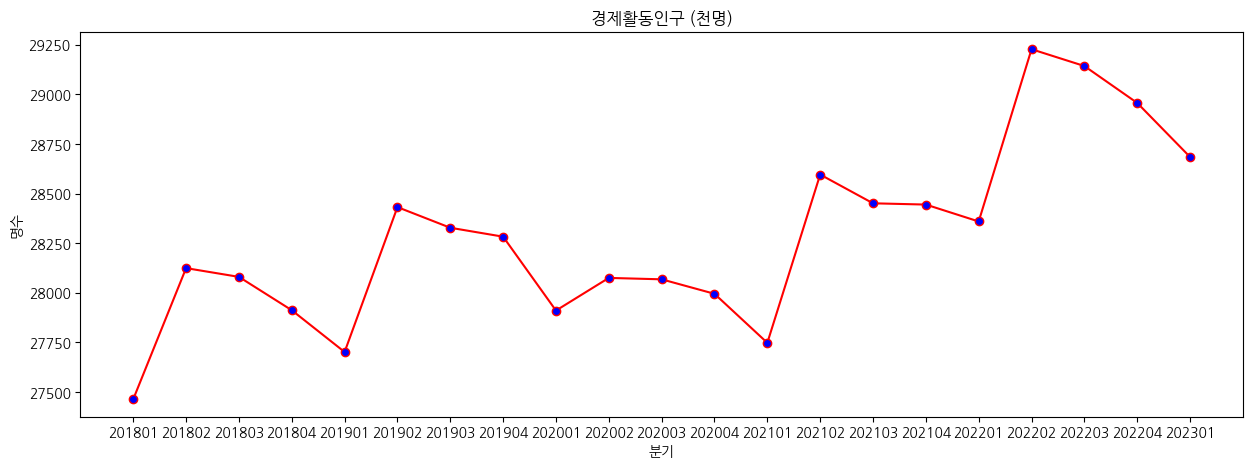

In [115]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))

plt.plot(x,y,
         color='red',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.title('경제활동인구 (천명)')
plt.xlabel('분기')
plt.ylabel('명수')

plt.show()

In [109]:
#15세 이상 -> 취업자 (천명)
employed = total_num[42:63]
employed_x = employed.iloc[:,0]
employed_y = employed.iloc[:,1]
employed_x = employed_x.to_list()
employed_y = employed_y.to_list()
employed_y = list(map(float, employed_y))
#15세 이상 -> 실업자 (천명)
unemployed = total_num[63:84]
unemployed_x = unemployed.iloc[:,0]
unemployed_y = unemployed.iloc[:,1]
unemployed_x = unemployed_x.to_list()
unemployed_y = unemployed_y.to_list()
unemployed_y = list(map(float, unemployed_y))

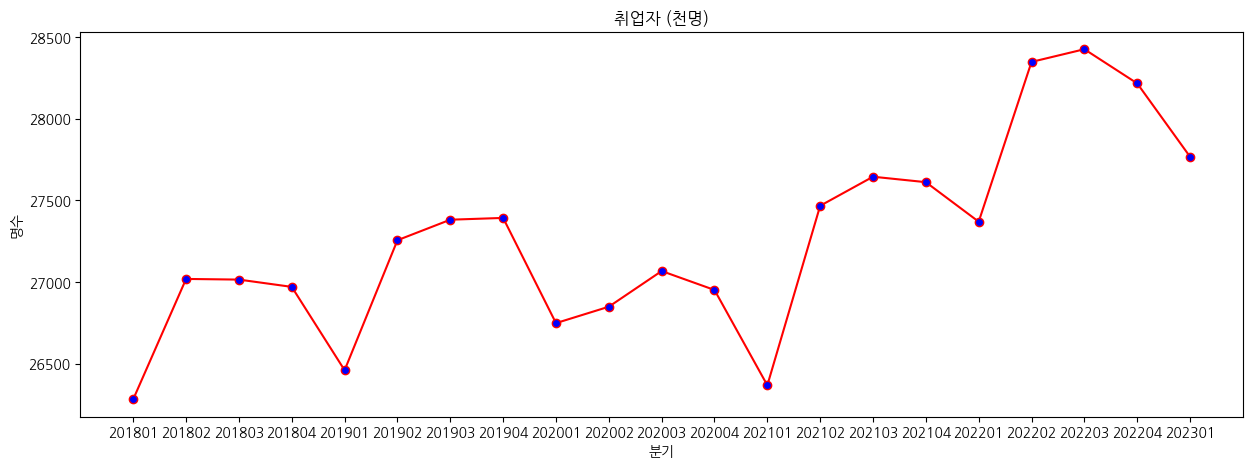

In [116]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))

plt.plot(employed_x, employed_y,
         color='red',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.title('취업자 (천명)')
plt.xlabel('분기')
plt.ylabel('명수')

plt.show()

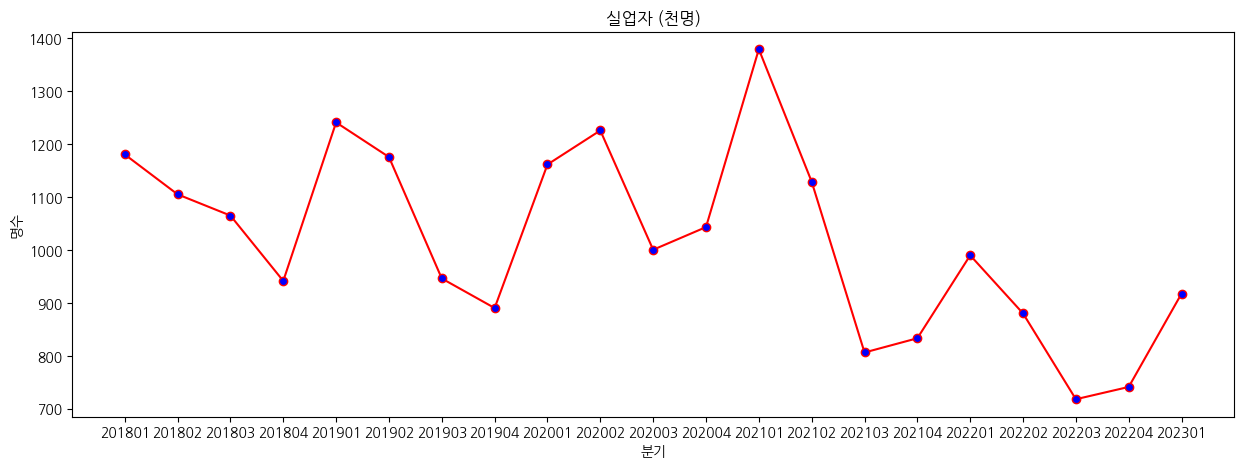

In [117]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))

plt.plot(unemployed_x, unemployed_y,
         color='red',
         marker='o', markerfacecolor='blue',
         markersize=6)
plt.title('실업자 (천명)')
plt.xlabel('분기')
plt.ylabel('명수')

plt.show()